In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 1000)

# Leitura dos Dados

In [2]:
file_path = 'C:\\Users\\doniz\\Documents\\ChurnAnalysis-Telco\\WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
df = pd.read_csv(file_path)

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
# Verificar tipos de dados para cada coluna
print("Tipos de dados:\n", df.dtypes)

Tipos de dados:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [4]:
# Usando errors='coerce' para converter valores não-numéricos em NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [40]:
# Verificar a existência de valores ausentes
print("Valores ausentes por coluna:\n", df.isnull().sum())

Valores ausentes por coluna:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


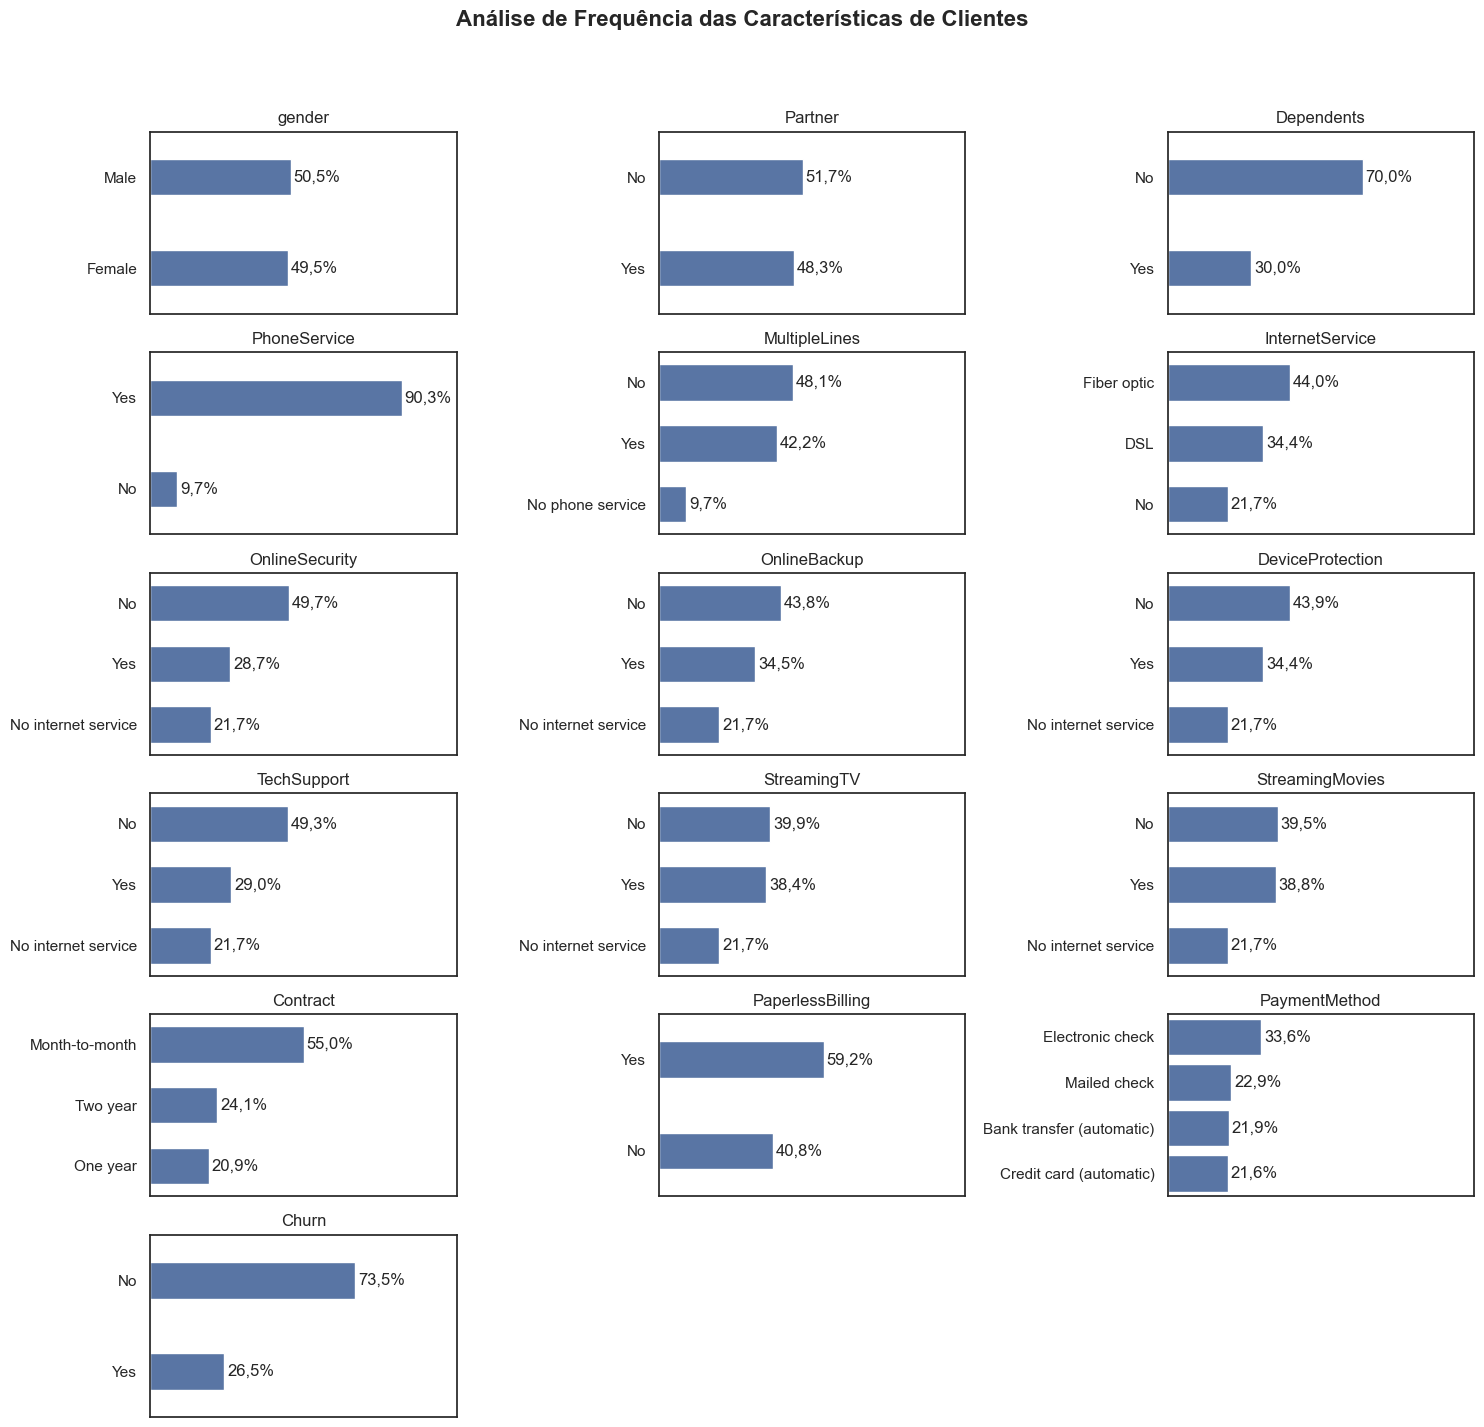

In [31]:
sns.set(style="white")

# Lista de todas as colunas que deseja plotar
todas_colunas = df.dtypes[(df.dtypes == 'object')&(df.dtypes.index != 'customerID')].index
num_cols = 3  # Número de colunas por linha

# Criando a figura e os subplots (eixos) com duas linhas e três colunas
fig, axes = plt.subplots(nrows=ceil(len(todas_colunas)/num_cols), ncols=num_cols, figsize=(15, 15))

max_categories = 0
for colunas in todas_colunas:
  max_categories = max(df[colunas].nunique(),max_categories)

# Iterando sobre todas as colunas e criando um gráfico para cada uma
for i, coluna in enumerate(todas_colunas):
    row = i // num_cols  # Determina a linha atual
    col = i % num_cols   # Determina a coluna atual

    cate = (df[coluna].nunique() / max_categories) * 0.8
    df_plot = df[coluna].value_counts(normalize=True).to_frame(name='proportion')
    sns.barplot(data=df_plot, x='proportion', y=df_plot.index, orient='h', ax=axes[row, col], width=cate)
    axes[row, col].set_title(coluna)
    axes[row, col].set_ylabel('')
    axes[row, col].set_xlabel('')
    axes[row, col].get_xaxis().set_visible(False)
    axes[row, col].set_xlim(0, 1.1)
    for index, value in enumerate(df_plot['proportion']):
        label = f'{value * 100:.1f}%'.replace('.', ',')
        axes[row, col].text(value + 0.01, index, label, va='center')

# Esconder os eixos extras se houver (se não usou todos os subplots)
for j in range(i+1, num_cols * axes.shape[0]):
    row = j // num_cols
    col = j % num_cols
    axes[row, col].set_visible(False)

# Adicionando um título geral acima de todos os subplots
fig.suptitle('Análise de Frequência das Características de Clientes', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta o layout para dar espaço para o suptitle
plt.show()


In [6]:
df[['MonthlyCharges','TotalCharges']].describe()

,MonthlyCharges,TotalCharges
count,7043.00,7032.00
mean,64.76,2283.30
std,30.09,2266.77
min,18.25,18.80
25%,35.50,401.45
50%,70.35,1397.47
75%,89.85,3794.74
max,118.75,8684.80


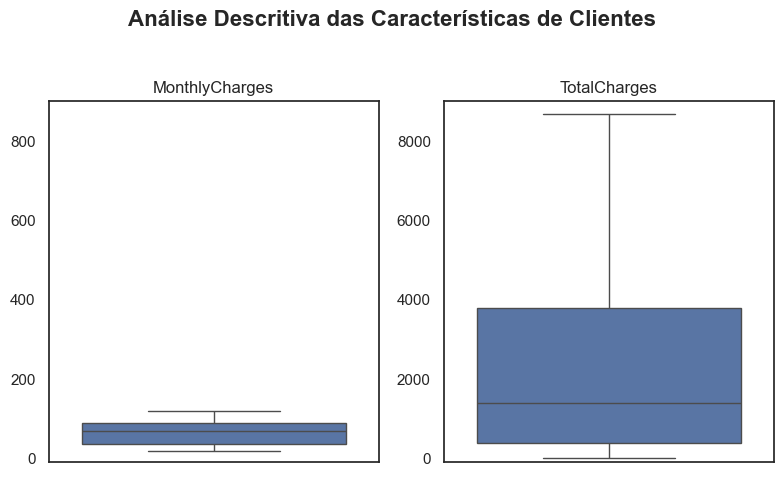

Valores:
        MonthlyCharges  TotalCharges
count         7043.00       7032.00
mean            64.76       2283.30
std             30.09       2266.77
min             18.25         18.80
25%             35.50        401.45
50%             70.35       1397.47
75%             89.85       3794.74
max            118.75       8684.80


In [29]:
sns.set(style="white")

# Lista de todas as colunas que deseja plotar
todas_colunas = df[['MonthlyCharges','TotalCharges']].dtypes.index
num_cols = 2  # Número de colunas por linha

# Criando a figura e os subplots (eixos) com duas linhas e três colunas
fig, axes = plt.subplots(nrows=ceil(len(todas_colunas)/num_cols), ncols=num_cols, figsize=(8, 5))

for i, coluna in enumerate(todas_colunas):
    row = i // num_cols  # Determina a linha atual
    col = i % num_cols   # Determina a coluna atual

    sns.boxplot(y=df[coluna], ax=axes[i])
    axes[i].set_ylabel('')
    axes[i].set_title(coluna)

axes[0].set_ylim(-10, 900)
axes[1].set_ylim(-100, 9000)

# Adicionando um título geral acima de todos os subplots
fig.suptitle('Análise Descritiva das Características de Clientes', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta o layout para dar espaço para o suptitle
plt.show()

print("Valores:\n",+df[['MonthlyCharges','TotalCharges']].describe())